# Food Inspections - CHECKPOINT #1

- Karina Lizette Gamboa Puente
- Miguel López Cruz
- Oscar Arturo Bringas López
- Aide Jazmín González Cruz




## Requerimientos

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
from os.path import dirname

In [3]:
sys.path.append(dirname('../src'))

In [4]:
from src.utils import utils

## Datos 

In [5]:
df = pd.read_csv("../data/Food_Inspections.csv")
# df.head(5)

## Profiling inicial
**Obteniendo infromación general del dataset**

- Filas y columnas

In [6]:
df.shape

(215130, 17)

- Columnas y tipo de columnas

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215130 entries, 0 to 215129
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Inspection ID    215130 non-null  int64  
 1   DBA Name         215130 non-null  object 
 2   AKA Name         212643 non-null  object 
 3   License #        215113 non-null  float64
 4   Facility Type    210238 non-null  object 
 5   Risk             215061 non-null  object 
 6   Address          215130 non-null  object 
 7   City             214972 non-null  object 
 8   State            215080 non-null  object 
 9   Zip              215078 non-null  float64
 10  Inspection Date  215130 non-null  object 
 11  Inspection Type  215129 non-null  object 
 12  Results          215130 non-null  object 
 13  Violations       157683 non-null  object 
 14  Latitude         214420 non-null  float64
 15  Longitude        214420 non-null  float64
 16  Location         214420 non-null  obje

- Datos únicos por variable

In [8]:
utils.unicos_val_by_col(df)

Inspection ID:  215130
DBA Name:  28753
AKA Name:  27361
License #:  39112
Facility Type:  501
Risk:  5
Address:  18525
City:  71
State:  5
Zip:  113
Inspection Date:  2797
Inspection Type:  111
Results:  7
Violations:  156735
Latitude:  17249
Longitude:  17249
Location:  17249



    - Variables numéricas

In [9]:
number_variables = df.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(5,
 array(['Inspection ID', 'License #', 'Zip', 'Latitude', 'Longitude'],
       dtype=object))

    - Fechas

In [10]:
dates_variables = df.select_dtypes(include = 'datetime').columns.values
(len(dates_variables), dates_variables)

(0, array([], dtype=object))

    - Variables categóricas

In [11]:
category_variables = df.select_dtypes(include = 'category').columns.values
(len(category_variables), category_variables)

(0, array([], dtype=object))

    - Strings 

In [12]:
string_variables = df.select_dtypes(include = 'object').columns.values
(len(string_variables), string_variables)

(12,
 array(['DBA Name', 'AKA Name', 'Facility Type', 'Risk', 'Address', 'City',
        'State', 'Inspection Date', 'Inspection Type', 'Results',
        'Violations', 'Location'], dtype=object))

**Para variables númericas**

In [13]:
numeric_profiling_output = {elem: utils.numeric_profiling(df, elem)\
                             for elem in number_variables}

df_numeric_profiling = pd.DataFrame(numeric_profiling_output).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,Inspection ID,License #,Zip,Latitude,Longitude
0,max,2.472776e+06,9.999999e+06,60827.000000,42.021064,-87.525094
1,min,4.424700e+04,0.000000e+00,10014.000000,41.644670,-87.914428
2,mean,1.528870e+06,1.630342e+06,60628.759227,41.880910,-87.676426
3,stdv,6.614742e+05,9.027653e+05,116.778081,0.081026,0.058527
4,25%,1.188711e+06,1.247748e+06,60614.000000,41.832580,-87.707338
5,median,1.528174e+06,1.992224e+06,60625.000000,41.891893,-87.666420
6,75%,2.104620e+06,2.278360e+06,60643.000000,41.939792,-87.634955
7,kurtosis,-7.228740e-01,-5.338266e-01,165217.314759,-0.350778,2.425704
8,skewness,-5.389695e-01,-8.821248e-01,-388.436249,-0.589562,-1.046365
9,uniques,2.151300e+05,3.911100e+04,112.000000,17248.000000,17248.000000


**Para variables de fecha**

In [14]:
date_profiling_output = {elem: categorical_profiling(df, elem)\
                             for elem in dates_variables}

df_date_profiling = pd.DataFrame(date_profiling_output).reset_index()
df_date_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_date_profiling

,metric


**Para variables categóricas**

In [15]:
category_profiling_output = {elem: utils.categorical_profiling(df, elem)\
                             for elem in string_variables}

df_category_profiling = pd.DataFrame(category_profiling_output).reset_index()
df_category_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling

,metric,DBA Name,AKA Name,Facility Type,Risk,Address,City,State,Inspection Date,Inspection Type,Results,Violations,Location
0,mode,[SUBWAY],[SUBWAY],[Restaurant],[Risk 1 (High)],[11601 W TOUHY AVE ],[CHICAGO],[IL],[11/14/2013],[Canvass],[Pass],[32. FOOD AND NON-FOOD CONTACT SURFACES PROPER...,"[(-87.91442843927047, 42.008536400868735)]"
1,numero_categorias,28753,27360,500,4,18525,70,4,2797,110,7,156734,17248
2,nombres_categoria,"[HOT DOG STATION, TIERRA MEXICANA, AQUA FOOD &...","[HOT DOG STATION, TIERRA MEXICANA, AQUA FOOD &...","[Restaurant, Grocery Store, nan, Catering, Sch...","[Risk 1 (High), Risk 3 (Low), Risk 2 (Medium),...","[4742 N KIMBALL AVE , 5423 W BELMONT AVE , 503...","[CHICAGO, Chicago, nan, chicago, ELMHURST, CHI...","[IL, nan, NY, IN, WI]","[01/15/2021, 01/14/2021, 01/13/2021, 01/12/202...","[Canvass Re-Inspection, Canvass, License, Lice...","[Pass, Out of Business, Pass w/ Conditions, No...",[56. ADEQUATE VENTILATION & LIGHTING; DESIGNAT...,"[(-87.7134972229382, 41.96785571643644), (-87...."
3,valores_unicos,28753,27360,500,4,18525,70,4,2797,110,7,156734,17248
4,renglones_totales,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130
5,faltantes_totales,0,2487,4892,69,0,158,50,0,1,0,57447,710
6,proporcion_faltantes,0,1.15605,2.27397,0.0320736,0,0.073444,0.0232418,0,0.000464835,0,26.7034,0.330033
7,top1,SUBWAY,SUBWAY,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,11/14/2013,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,"(-87.91442843927047, 42.008536400868735)"
8,top2,DUNKIN DONUTS,DUNKIN DONUTS,Grocery Store,Risk 2 (Medium),5700 S CICERO AVE,Chicago,WI,09/13/2016,License,Fail,45. FOOD HANDLER REQUIREMENTS MET - Comments: ...,"(-87.74164564419637, 41.789329323265385)"
9,top3,MCDONALD'S,7-ELEVEN,School,Risk 3 (Low),500 W MADISON ST,chicago,NY,11/29/2016,Canvass Re-Inspection,Pass w/ Conditions,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...","(-87.64111966683218, 41.884187507127805)"


## Identificación de variables y transformaciones: 


- Renombrando columnas

In [16]:
df.rename(columns={col: utils.clean_column(col) for col in df.columns.values}, inplace=True)
df.columns

Index(['inspection_id', 'dba_name', 'aka_name', 'license_#', 'facility_type',
       'risk', 'address', 'city', 'state', 'zip', 'inspection_date',
       'inspection_type', 'results', 'violations', 'latitude', 'longitude',
       'location'],
      dtype='object')

- Creando la variable `label`

In [17]:
df['label'] = np.where(df.results.isin(['Pass','Pass w/ Conditions']), 1, 0)

- Convirtiendo inspection_date a date

In [18]:
df['inspection_date'] = pd.to_datetime(df['inspection_date'])

- Convirtiendo ID a string

In [19]:
df['inspection_id'] = df['inspection_id'].astype(str)

- Convirtiendo Licencia a string

In [20]:
df['license_#'] = df['license_#'].astype(str)

- Convirtiendo ZIP a categorico

In [21]:
 df['zip']= df['zip'].astype('category')

Se hacen los cambios de las 3 últimas variables ya que se considera que no se obtiene información relevante obteniendo medidas de tendencia central de las vaiables de manera númerica.  

##  Data profiling segunda vuelta

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215130 entries, 0 to 215129
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   inspection_id    215130 non-null  object        
 1   dba_name         215130 non-null  object        
 2   aka_name         212643 non-null  object        
 3   license_#        215130 non-null  object        
 4   facility_type    210238 non-null  object        
 5   risk             215061 non-null  object        
 6   address          215130 non-null  object        
 7   city             214972 non-null  object        
 8   state            215080 non-null  object        
 9   zip              215078 non-null  category      
 10  inspection_date  215130 non-null  datetime64[ns]
 11  inspection_type  215129 non-null  object        
 12  results          215130 non-null  object        
 13  violations       157683 non-null  object        
 14  latitude         214


    - Variables numéricas

In [23]:
number_variables = df.select_dtypes(include = 'number').columns.values
(len(number_variables), number_variables)

(3, array(['latitude', 'longitude', 'label'], dtype=object))

    - Fechas

In [24]:
dates_variables = df.select_dtypes(include = 'datetime').columns.values
(len(dates_variables), dates_variables)

(1, array(['inspection_date'], dtype=object))

    - Variables categóricas

In [25]:
category_variables = df.select_dtypes(include = 'category').columns.values
(len(category_variables), category_variables)

(1, array(['zip'], dtype=object))

    - Strings 

In [26]:
string_variables = df.select_dtypes(include = 'object').columns.values
(len(string_variables), string_variables)

(13,
 array(['inspection_id', 'dba_name', 'aka_name', 'license_#',
        'facility_type', 'risk', 'address', 'city', 'state',
        'inspection_type', 'results', 'violations', 'location'],
       dtype=object))

**Para variables númericas**

In [27]:
numeric_profiling_output = {elem: utils.numeric_profiling(df, elem)\
                             for elem in number_variables}

df_numeric_profiling = pd.DataFrame(numeric_profiling_output).reset_index()
df_numeric_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_numeric_profiling

,metric,latitude,longitude,label
0,max,42.021064,-87.525094,1
1,min,41.644670,-87.914428,0
2,mean,41.880910,-87.676426,0.674899
3,stdv,0.081026,0.058527,0.468414
4,25%,41.832580,-87.707338,0
5,median,41.891893,-87.666420,1
6,75%,41.939792,-87.634955,1
7,kurtosis,-0.350778,2.425704,-1.44234
8,skewness,-0.589562,-1.046365,-0.746778
9,uniques,17248.000000,17248.000000,2


**Para variables de fecha**

In [28]:
date_profiling_output = {elem: utils.categorical_profiling(df, elem)\
                             for elem in dates_variables}

df_date_profiling = pd.DataFrame(date_profiling_output).reset_index()
df_date_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_date_profiling

,metric,inspection_date
0,faltantes_totales,0
1,mode,[2013-11-14T00:00:00.000000000]
2,nombres_categoria,"[2021-01-15T00:00:00.000000000, 2021-01-14T00:..."
3,numero_categorias,2797
4,proporcion_faltantes,0
5,renglones_totales,215130
6,top1,2013-11-14 00:00:00
7,top2,2016-09-13 00:00:00
8,top3,2016-11-29 00:00:00
9,valores_unicos,2797


**Para variables categóricas**

In [29]:
category_profiling_output = {elem: utils.categorical_profiling(df, elem)\
                             for elem in string_variables}

df_category_profiling = pd.DataFrame(category_profiling_output).reset_index()
df_category_profiling.rename(columns={'index': 'metric'}, inplace=True)
df_category_profiling

,metric,inspection_id,dba_name,aka_name,license_#,facility_type,risk,address,city,state,inspection_type,results,violations,location
0,mode,"[100209, 100210, 100211, 100212, 100213, 10021...",[SUBWAY],[SUBWAY],[0.0],[Restaurant],[Risk 1 (High)],[11601 W TOUHY AVE ],[CHICAGO],[IL],[Canvass],[Pass],[32. FOOD AND NON-FOOD CONTACT SURFACES PROPER...,"[(-87.91442843927047, 42.008536400868735)]"
1,numero_categorias,215130,28753,27360,39112,500,4,18525,70,4,110,7,156734,17248
2,nombres_categoria,"[2472776, 2472716, 2472708, 2472722, 2472698, ...","[HOT DOG STATION, TIERRA MEXICANA, AQUA FOOD &...","[HOT DOG STATION, TIERRA MEXICANA, AQUA FOOD &...","[2153527.0, 2483240.0, 2762442.0, 2637127.0, 2...","[Restaurant, Grocery Store, nan, Catering, Sch...","[Risk 1 (High), Risk 3 (Low), Risk 2 (Medium),...","[4742 N KIMBALL AVE , 5423 W BELMONT AVE , 503...","[CHICAGO, Chicago, nan, chicago, ELMHURST, CHI...","[IL, nan, NY, IN, WI]","[Canvass Re-Inspection, Canvass, License, Lice...","[Pass, Out of Business, Pass w/ Conditions, No...",[56. ADEQUATE VENTILATION & LIGHTING; DESIGNAT...,"[(-87.7134972229382, 41.96785571643644), (-87...."
3,valores_unicos,215130,28753,27360,39112,500,4,18525,70,4,110,7,156734,17248
4,renglones_totales,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130,215130
5,faltantes_totales,0,0,2487,0,4892,69,0,158,50,1,0,57447,710
6,proporcion_faltantes,0,0,1.15605,0,2.27397,0.0320736,0,0.073444,0.0232418,0.000464835,0,26.7034,0.330033
7,top1,98545,SUBWAY,SUBWAY,0.0,Restaurant,Risk 1 (High),11601 W TOUHY AVE,CHICAGO,IL,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,"(-87.91442843927047, 42.008536400868735)"
8,top2,1547071,DUNKIN DONUTS,DUNKIN DONUTS,1354323.0,Grocery Store,Risk 2 (Medium),5700 S CICERO AVE,Chicago,WI,License,Fail,45. FOOD HANDLER REQUIREMENTS MET - Comments: ...,"(-87.74164564419637, 41.789329323265385)"
9,top3,1547095,MCDONALD'S,7-ELEVEN,14616.0,School,Risk 3 (Low),500 W MADISON ST,chicago,NY,Canvass Re-Inspection,Pass w/ Conditions,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...","(-87.64111966683218, 41.884187507127805)"


### Preguntas a resolver

- ¿Cuántas inspecciones hay al día?

In [30]:
round(df.groupby("inspection_date")["inspection_date"].value_counts().mean(),1)

76.9

- ¿Cuántos establecimientos hay por cada tipo de riesgo?

In [31]:
prop_codigo = df.groupby(['risk'], as_index=False)['inspection_date']\
.count()\
.rename(columns={'inspection_date': 'count'})
prop_codigo['prop'] = prop_codigo['count']/np.sum(prop_codigo['count'])
prop_codigo.sort_values(by = ['prop'], ascending = False)

,risk,count,prop
1,Risk 1 (High),153869,0.715467
2,Risk 2 (Medium),41978,0.195191
3,Risk 3 (Low),19185,0.089207
0,All,29,0.000135


- ¿Cuántos establecimientos hay por tipo de resultado?

In [32]:
prop_codigo = df.groupby(['results'], as_index=False)['inspection_date']\
.count()\
.rename(columns={'inspection_date': 'count'})
prop_codigo['prop'] = prop_codigo['count']/np.sum(prop_codigo['count'])
prop_codigo.sort_values(by = ['prop'], ascending = False)

,results,count,prop
5,Pass,112641,0.523595
1,Fail,41527,0.193032
6,Pass w/ Conditions,32550,0.151304
4,Out of Business,18709,0.086966
2,No Entry,7341,0.034124
3,Not Ready,2290,0.010645
0,Business Not Located,72,0.000335


- ¿Hay una relación entre el tipo de riesgo y el resultado obtenido de la inspección?

In [33]:
prop_codigo = df.groupby(['risk','results'], as_index=False)['inspection_date']\
.count()\
.rename(columns={'inspection_date': 'count'})
prop_codigo['prop'] = prop_codigo['count']/np.sum(prop_codigo['count'])
prop_codigo.sort_values(by = ['prop'], ascending = False)

,risk,results,count,prop
10,Risk 1 (High),Pass,83101,0.386407
6,Risk 1 (High),Fail,29287,0.136180
11,Risk 1 (High),Pass w/ Conditions,24739,0.115032
17,Risk 2 (Medium),Pass,21662,0.100725
9,Risk 1 (High),Out of Business,9560,0.044453
13,Risk 2 (Medium),Fail,8083,0.037585
24,Risk 3 (Low),Pass,7866,0.036576
18,Risk 2 (Medium),Pass w/ Conditions,6303,0.029308
7,Risk 1 (High),No Entry,5910,0.027481
23,Risk 3 (Low),Out of Business,4925,0.022900


- Frecuencia de tipo de violaciones

In [34]:
prop_codigo = df.groupby(['violations'], as_index=False)['inspection_date']\
.count()\
.rename(columns={'inspection_date': 'count'})
prop_codigo['prop'] = prop_codigo['count']/np.sum(prop_codigo['count'])
prop_codigo.sort_values(by = ['prop'], ascending = False)

,violations,count,prop
98883,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,11,0.000070
143434,45. FOOD HANDLER REQUIREMENTS MET - Comments: ...,10,0.000063
68957,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",10,0.000063
82074,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,7,0.000044
143436,45. FOOD HANDLER REQUIREMENTS MET - Comments: ...,7,0.000044
...,...,...,...
52312,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",1,0.000006
52313,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",1,0.000006
52314,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",1,0.000006
52315,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",1,0.000006


- Tipo de establecimientos registrados

In [35]:
prop_codigo = df.groupby(['facility_type'], as_index=False)['inspection_date']\
.count()\
.rename(columns={'inspection_date': 'count'})
prop_codigo['prop'] = prop_codigo['count']/np.sum(prop_codigo['count'])
prop_codigo.sort_values(by = ['prop'], ascending = False)

,facility_type,count,prop
385,Restaurant,143249,0.681366
216,Grocery Store,28093,0.133625
405,School,13206,0.062815
112,Children's Services Facility,3711,0.017651
45,Bakery,3153,0.014997
...,...,...,...
186,GROCERY & RESTAURANT,1,0.000005
205,GROCERY/LIQUOR,1,0.000005
206,GROCERY/LIQUOR STORE,1,0.000005
381,ROOFTOP PATIO,1,0.000005


## GEDA

* Distribución de la variable respuesta y la variable label

Analizando los datos, se considera importante retirar los registros de aquellos establecimientos que no fueron encontrados o donde no se pudo realizar una inspección, esto debido a que no se conoce cuál hubiera sido el resultado de la inspección y para fines del proyecto se requiere conocer las carácteristicas de aquellos establecimiento que acreditaron o no la inspección.

In [36]:
df_label = df[df.results.isin(['Pass','Pass w/ Conditions', 'Fail'])]

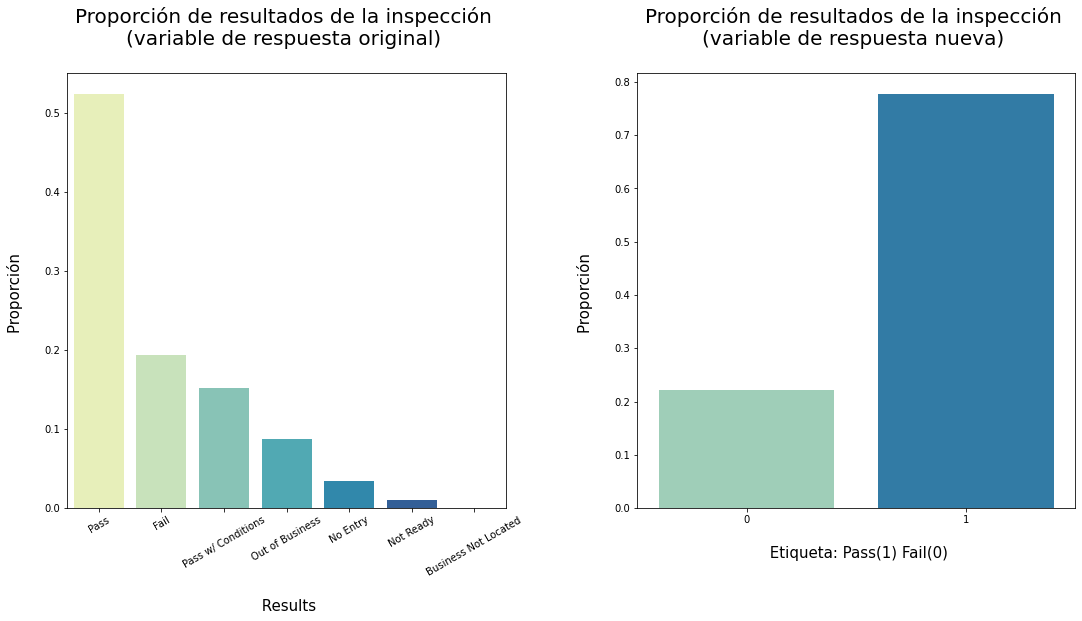

In [37]:
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(left=0.2, wspace=0.3)

ax1 = plt.subplot2grid((1,2),(0,0))
a = sns.barplot(x=df.results.value_counts().index, 
                    y=df.results.value_counts()/len(df), 
                    data=df,           
                    palette='YlGnBu')
plt.title("Proporción de resultados de la inspección \n(variable de respuesta original) \n", size= 20)
plt.xlabel("\n Results", size = 15)
plt.ylabel("Proporción \n", size = 15)
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.yaxis.set_major_formatter(plt.FuncFormatter(utils.number_formatter))

ax1 = plt.subplot2grid((1,2),(0,1))
b = sns.barplot(x=df_label.label.value_counts().index, 
                    y=df_label.label.value_counts()/len(df_label), 
                    data=df_label,           
                    palette='YlGnBu')
plt.title("Proporción de resultados de la inspección \n(variable de respuesta nueva) \n", size= 20)
plt.xlabel("\n Etiqueta: Pass(1) Fail(0)", size = 15)
plt.ylabel("Proporción \n", size = 15)
b.yaxis.set_major_formatter(plt.FuncFormatter(utils.number_formatter))

plt.show()

* Distribución de la nueva variable respuesta y la variable Riesgo

In [38]:
riesgo_label = df_label.groupby(['risk', 'label'],
                          as_index=False)['inspection_id']\
                          .count()\
                          .rename(columns={'inspection_id': 'registros'})

<Figure size 2880x2880 with 0 Axes>

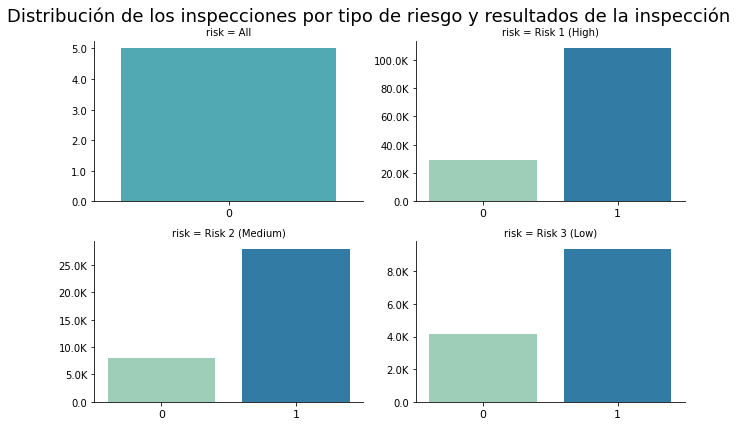

In [39]:
fig = plt.figure(figsize=(40,40))

a = sns.FacetGrid(data=riesgo_label, col='risk', col_wrap=2, sharex=False, sharey=False,
                 aspect=1.5)
a.map_dataframe(sns.barplot, x='label', y='registros', palette = 'YlGnBu')
for ax in a.axes.flat:
    for label in ax.get_xticklabels():
        label.set_size(11)
        #label.set_rotation(50)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(utils.number_formatter))
        a.fig.tight_layout()

plt.subplots_adjust(top=0.9)
aux = a.fig.suptitle("Distribución de los inspecciones por tipo de riesgo y resultados de la inspección \n \n \n", fontsize=18)


* Distribución de las inspecciones durante los años

Transformación de fecha de inicio (año, mes y día)

In [40]:
df_label['ones'] = 1
df_label['año_insp'] = df_label['inspection_date'].dt.year.astype(str) 
df_label['mes_insp'] = df_label['inspection_date'].dt.month.astype(str) 
df_label['dia_insp'] = df_label['inspection_date'].dt.day.astype(str) 

df_label["mes_insp"].replace({"1": "01", "2": "02", "3": "03", "4": "04", "5": "05", 
                        "6": "06", "7": "07", "8": "08", "9": "09"}, inplace=True)

<ipython-input-40-ffae1c4b9517>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label['ones'] = 1
<ipython-input-40-ffae1c4b9517>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label['año_insp'] = df_label['inspection_date'].dt.year.astype(str)
<ipython-input-40-ffae1c4b9517>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [41]:
prop_codigo = df_label.groupby(['año_insp'], as_index=False)['inspection_date']\
.count()\
.rename(columns={'inspection_date': 'count'})
prop_codigo['prop'] = prop_codigo['count']/np.sum(prop_codigo['count'])
prop_codigo.sort_values(by = ['prop'], ascending = False)

,año_insp,count,prop
6,2016,19860,0.106364
4,2014,18621,0.099728
7,2017,18499,0.099075
5,2015,17892,0.095824
1,2011,17584,0.094174
0,2010,17381,0.093087
3,2013,17068,0.091411
9,2019,16121,0.086339
2,2012,16018,0.085787
8,2018,14849,0.079526


In [42]:
# sns.displot(data=df, y="mes_insp")

In [43]:
pivot_2=df_label#.dropna()
pivot_2=df_label[['mes_insp','año_insp','ones']]\
        .groupby(['mes_insp','año_insp']).sum().reset_index()
pivot_2=pivot_2.pivot(index='mes_insp',columns='año_insp',values='ones')
pivot_2=pd.DataFrame(pivot_2)
pivot_2.reset_index(inplace=True)
pivot_2 = pivot_2[['mes_insp','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']]

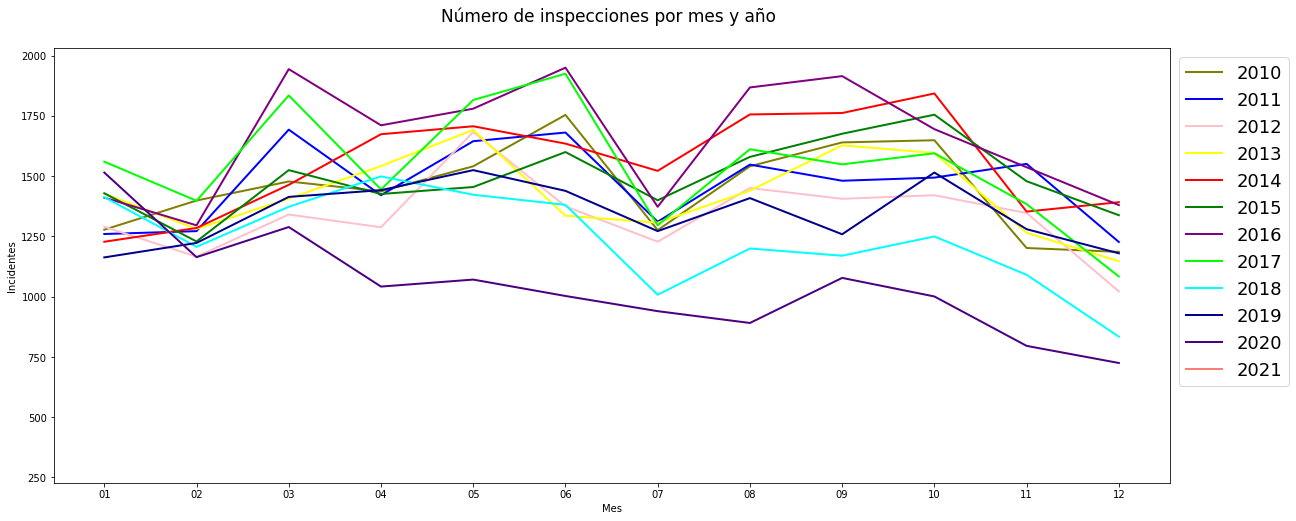

In [44]:
# multiple line plot
fig = plt.figure(figsize=(20,8))

plt.plot('mes_insp', '2010', data=pivot_2, color='olive', linewidth=2)
plt.plot('mes_insp', '2011', data=pivot_2, color='blue', linewidth=2)
plt.plot('mes_insp', '2012', data=pivot_2, color='pink', linewidth=2)
plt.plot('mes_insp', '2013', data=pivot_2, color='yellow', linewidth=2)
plt.plot('mes_insp', '2014', data=pivot_2, color='red', linewidth=2)
plt.plot('mes_insp', '2015', data=pivot_2, color='green', linewidth=2)
plt.plot('mes_insp', '2016', data=pivot_2, color='purple', linewidth=2)
plt.plot('mes_insp', '2017', data=pivot_2, color='lime', linewidth=2)
plt.plot('mes_insp', '2018', data=pivot_2, color='cyan', linewidth=2)
plt.plot('mes_insp', '2019', data=pivot_2, color='darkblue', linewidth=2)
plt.plot('mes_insp', '2020', data=pivot_2, color='indigo', linewidth=2)
plt.plot('mes_insp', '2021', data=pivot_2, color='salmon', linewidth=2)
plt.title('Número de inspecciones por mes y año \n', size = 17)
plt.ylabel('Incidentes')
plt.xlabel('Mes')
aux = plt.legend(bbox_to_anchor=(1, 1), fontsize = 18)

* Resultados de las inspecciones por año

In [45]:
año_label = df_label.groupby(['año_insp', 'label'],
                          as_index=False)['inspection_id']\
                          .count()\
                          .rename(columns={'inspection_id': 'registros'})

In [46]:
# año_label

<Figure size 1440x576 with 0 Axes>

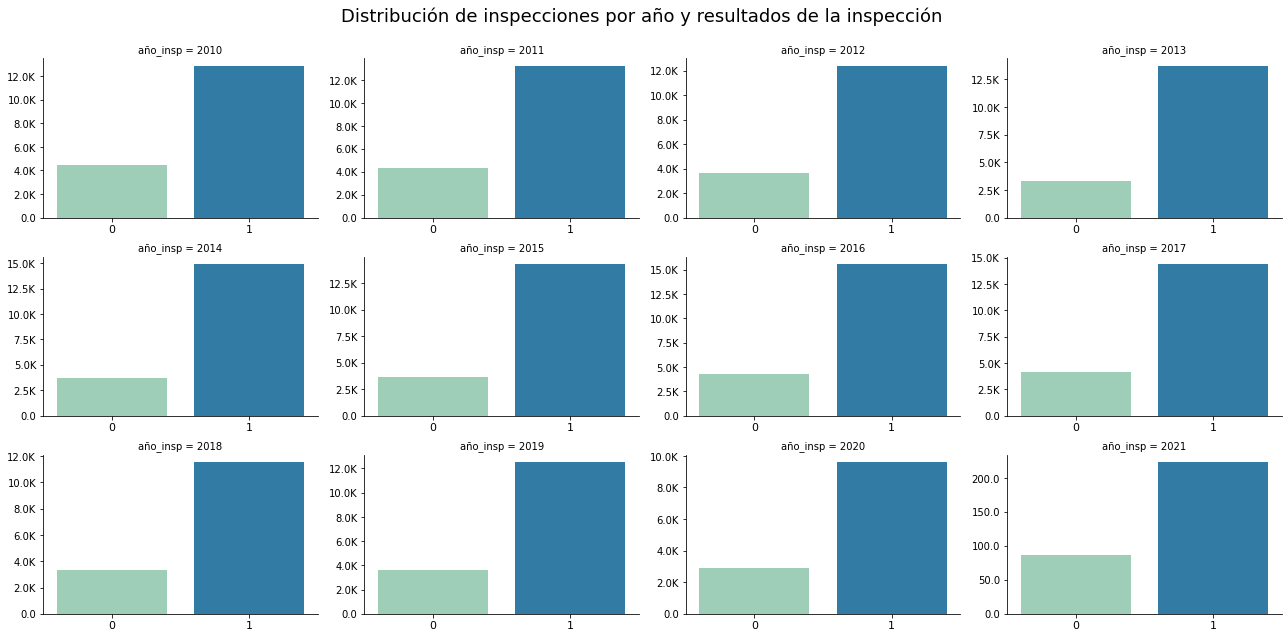

In [47]:
fig = plt.figure(figsize=(20,8))

a = sns.FacetGrid(data=año_label, col='año_insp', col_wrap=4, sharex=False, sharey=False,
                 aspect=1.5)
a.map_dataframe(sns.barplot, x='label', y='registros', palette = 'YlGnBu')
for ax in a.axes.flat:
    for label in ax.get_xticklabels():
        label.set_size(11)
        #label.set_rotation(50)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(utils.number_formatter))
        a.fig.tight_layout()

plt.subplots_adjust(top=0.9)
aux = a.fig.suptitle("Distribución de inspecciones por año y resultados de la inspección \n \n \n", fontsize=18)


* Distribución Geografica:

In [4]:
# R code for map creation


# library(dplyr)
# library(leaflet)
# library(readr)
# data <- read_csv("Food_Inspections.csv")
# pal = colorFactor(palette = c("gray", "red", "red", "red", "red", "green", "green"),
#                   domain = c("Business Not Located", "Fail", "No Entry", "Not Ready",
#                              "Out of Business", "Pass", "Pass w/ Conditions"))
# data %>%
#   sample_frac(size = 0.3) %>%
#   leaflet() %>%
#   addTiles() %>%
#   addProviderTiles(providers$CartoDB) %>%
#   addCircles(lng =~Longitude, lat =~Latitude,
#              radius =~ ifelse(Results %in% c("Pass", "Pass w/ Conditions"), 2, 3.2),
#              weight =~ ifelse(Results %in% c("Pass", "Pass w/ Conditions"), 1, 1.5),
#              opacity = 0.1,
#              color =~ pal(Results)) %>%
#   addLegend(position = "bottomright", pal = pal, values = ~Results)

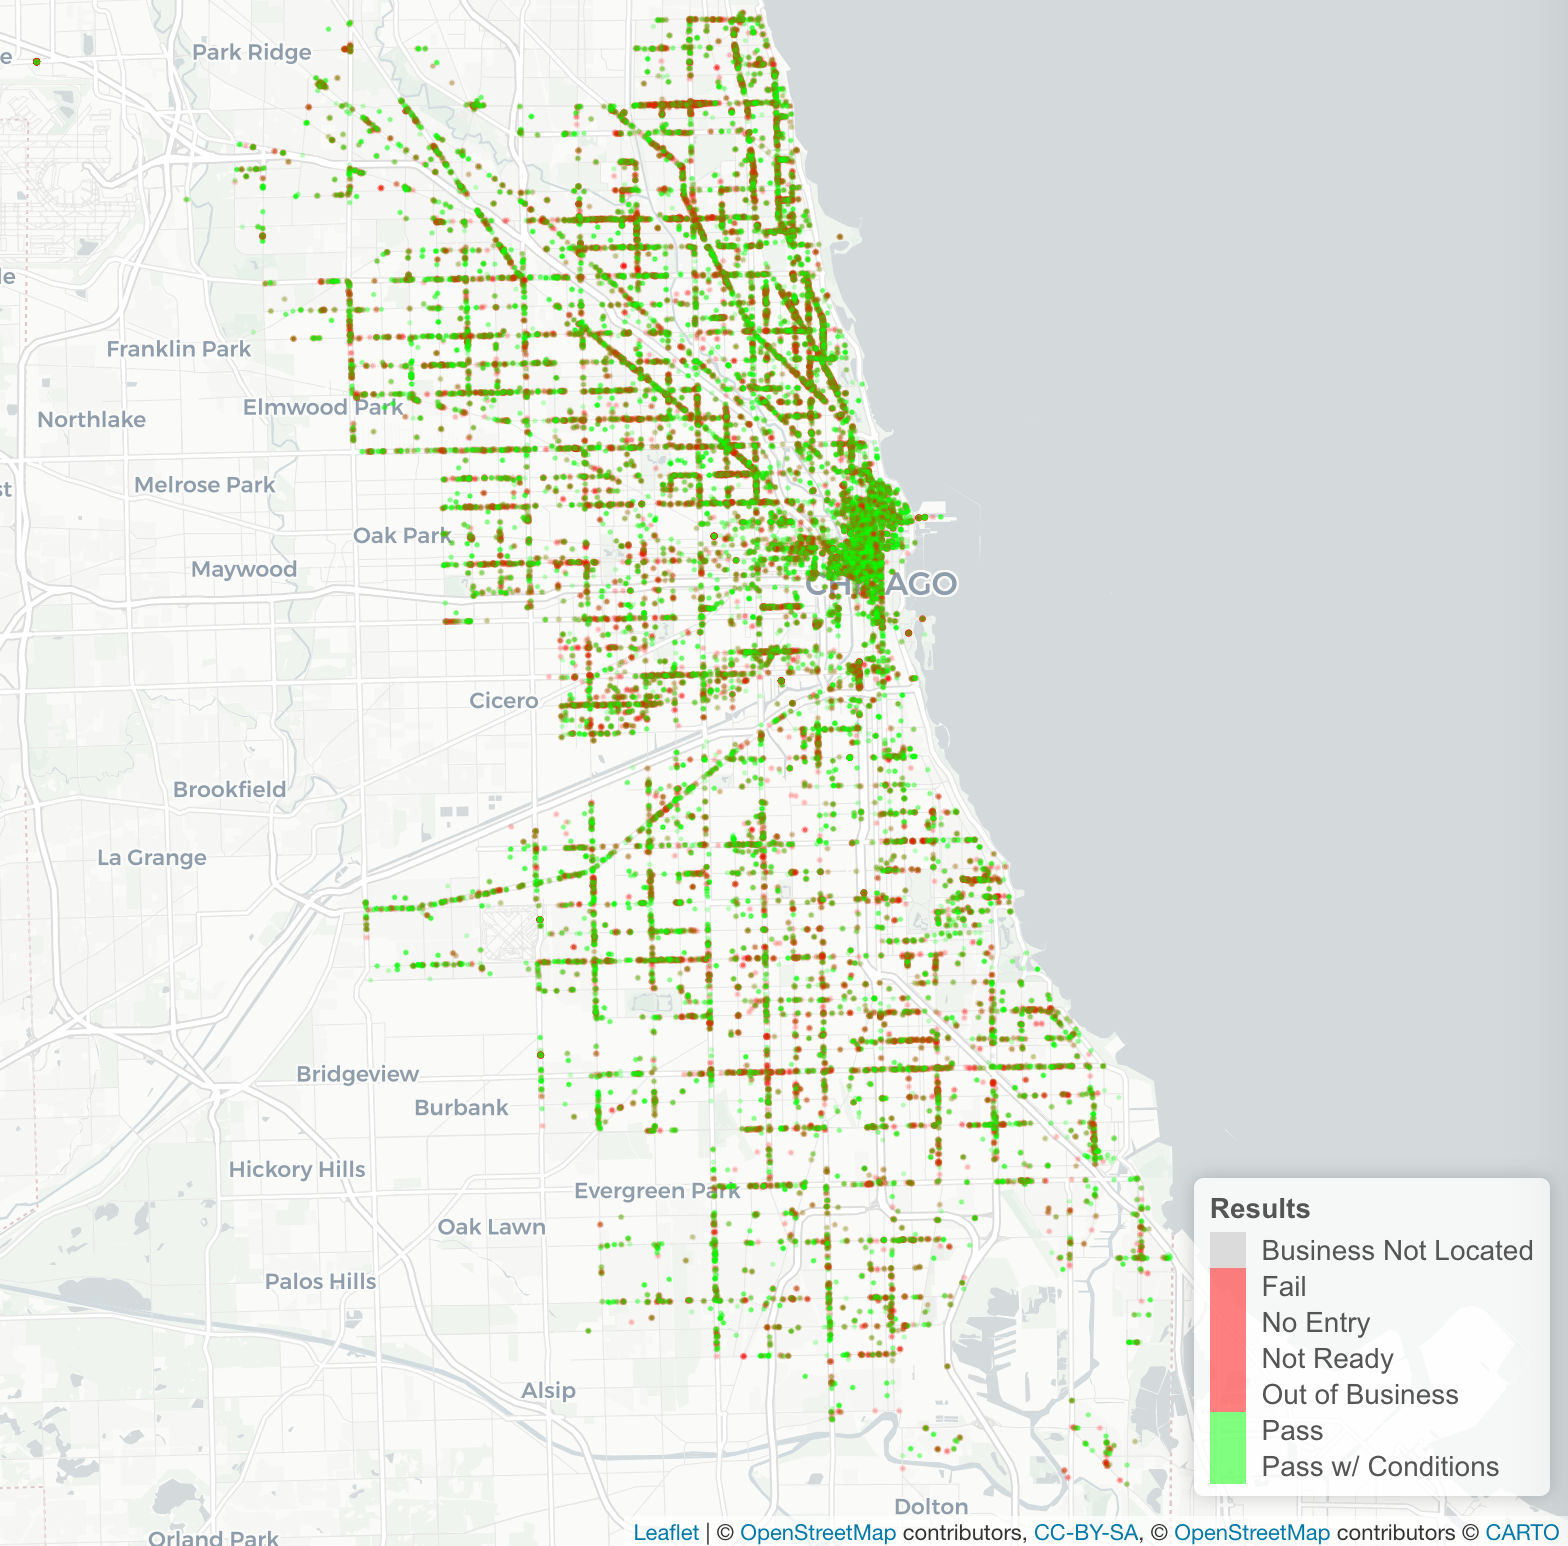

In [2]:
from IPython.display import Image
Image("mapa_food_inspections.png")